In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, roc_auc_score

import os
from IPython import display
%matplotlib inline

!pip install nilearn

from nilearn import plotting
import nibabel as nib
from scipy.signal import convolve


In [0]:
X_train = np.load('./drive/My Drive/fcd_colab/X_train.npy')
y_train = np.load('./drive/My Drive/fcd_colab/y_train.npy')
X_val = np.load('./drive/My Drive/fcd_colab/X_test.npy')
y_val = np.load('./drive/My Drive/fcd_colab/y_test.npy')

In [0]:
train_dataset = data.TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
val_dataset = data.TensorDataset(torch.FloatTensor(X_val), torch.LongTensor(y_val))

In [0]:
train_dataloader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = data.DataLoader(val_dataset, batch_size=128, shuffle=False)

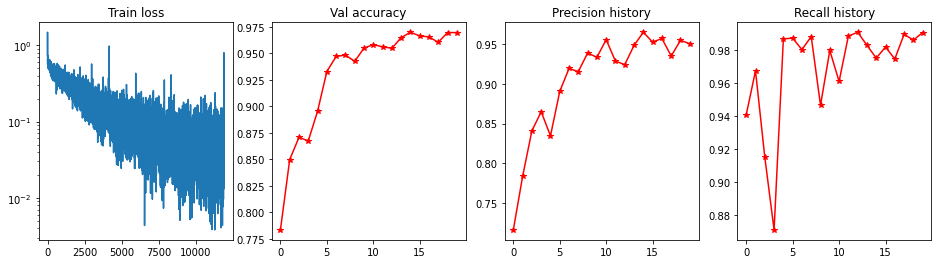

In [14]:
model = train(n_epochs=20, lr=3e-4, schedule_factor=.1, saving=True)

In [0]:
mask_generator = FCDMaskGenerator()
mask_generator.inference_pipeline('7_1_fcd_flirt_restore.nii.gz', 'fcd_7_1_flirt.nii.gz')